<a href="https://colab.research.google.com/github/viniciusrpb/visexp_irony/blob/master/sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### Function for plotting the confusion matrix

In [56]:
def plotConfusionMatrix(classifier,X_test,y_test,y_pred,class_names):
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,display_labels=class_names,cmap=plt.cm.Blues)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    return ;

#### Read the csv file of the tweets set

In [57]:
path_tweet_set = 'data/SemEval2018-T3-train-taskA.txt'

corpus_tweets = pd.read_csv(path_tweet_set,encoding="utf8",sep='\t')

labels = corpus_tweets['Label'].unique()

print(corpus_tweets.shape)

print(corpus_tweets.head())

print(labels)

(3817, 3)
   Tweet index  Label                                         Tweet text
0            1      1  Sweet United Nations video. Just in time for C...
1            2      1  @mrdahl87 We are rumored to have talked to Erv...
2            3      1  Hey there! Nice to see you Minnesota/ND Winter...
3            4      0                3 episodes left I'm dying over here
4            5      1  I can't breathe! was chosen as the most notabl...
[1 0]


In [58]:
vectorizer = TfidfVectorizer(norm=None, stop_words="english",max_df=0.95, min_df=2)
tfidf = vectorizer.fit_transform(corpus_tweets['Tweet text'])

#print(vectorizer.get_feature_names())
print(tfidf.shape)

(3817, 3427)


#### Split dataset into training and test sets

In [59]:
X = tfidf;
y = corpus_tweets['Label'];

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#### Classification by means of Support Vector Machine

              precision    recall  f1-score   support

           0       0.50      0.99      0.66       758
           1       0.57      0.02      0.03       769

    accuracy                           0.50      1527
   macro avg       0.53      0.50      0.35      1527
weighted avg       0.53      0.50      0.34      1527

Confusion matrix for MLP: 
[[748  10]
 [756  13]]
Confusion matrix, without normalization
[[748  10]
 [756  13]]
Normalized confusion matrix
[[748  10]
 [756  13]]


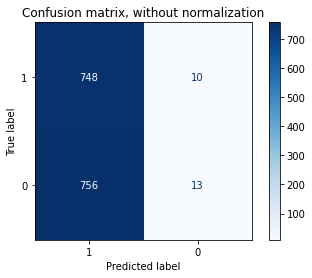

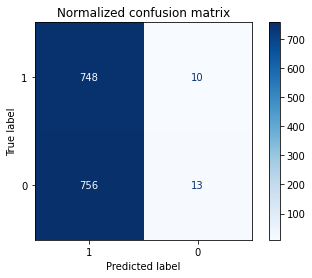

In [64]:
svm_clf = SVC(kernel='rbf',gamma=0.25,C=1000)

svm_clf.fit(X_train, y_train)
y_true, y_pred = y_test, svm_clf.predict(X_test)

print(classification_report(y_true, y_pred))
print("Confusion matrix for MLP: ")
print(confusion_matrix(y_true, y_pred))

plotConfusionMatrix(svm_clf,X_test,y_test,y_pred,labels)

#### Classification by means of Artificial Neural Network: Feed-forward Backpropagation Multilayer Perceptron

Detailed classification report for MLP: 
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       758
           1       0.61      0.62      0.61       769

    accuracy                           0.61      1527
   macro avg       0.61      0.61      0.61      1527
weighted avg       0.61      0.61      0.61      1527

Confusion matrix for MLP: 
[[449 309]
 [293 476]]
Confusion matrix, without normalization
[[449 309]
 [293 476]]
Normalized confusion matrix
[[449 309]
 [293 476]]


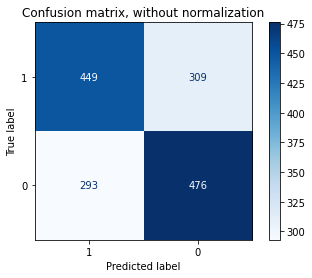

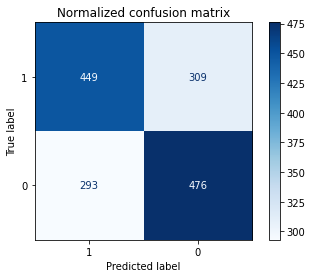

In [65]:
mlp_clf = MLPClassifier(hidden_layer_sizes= 12, max_iter= 1100, random_state= 6, solver= 'sgd')
mlp_clf.fit(X_train, y_train)
print("Detailed classification report for MLP: ")
y_true, y_pred = y_test, mlp_clf.predict(X_test)
print(classification_report(y_true, y_pred))
print("Confusion matrix for MLP: ")
print(confusion_matrix(y_true, y_pred))

plotConfusionMatrix(mlp_clf,X_test,y_test,y_pred,labels)

#### Naive Bayes Classification

Detailed classification report for Naive Bayes: 
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       758
           1       0.60      0.62      0.61       769

    accuracy                           0.60      1527
   macro avg       0.60      0.60      0.60      1527
weighted avg       0.60      0.60      0.60      1527

Confusion matrix for Naive Bayes: 
[[436 322]
 [292 477]]
Confusion matrix, without normalization
[[439 319]
 [297 472]]
Normalized confusion matrix
[[439 319]
 [297 472]]


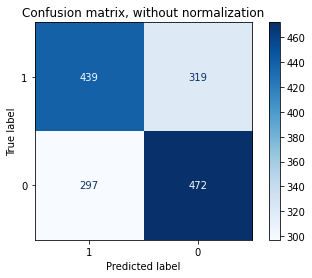

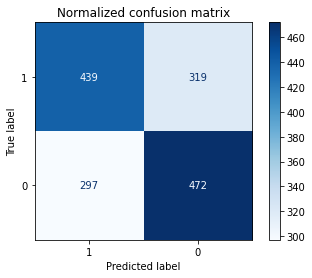

In [62]:
gnb_clf = MultinomialNB()
gnb_clf.fit(X_train, y_train)
y_pred = gnb_clf.predict(X_test)
print("Detailed classification report for Naive Bayes: ")
print(classification_report(y_test, y_pred))
print("Confusion matrix for Naive Bayes: ")
print(confusion_matrix(y_true, y_pred))

plotConfusionMatrix(gnb_clf,X_test,y_test,y_pred,labels)

### Randon forest classifier

Detailed classification report for Randon Forest: 
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       758
           1       0.57      0.61      0.59       769

    accuracy                           0.58      1527
   macro avg       0.58      0.58      0.57      1527
weighted avg       0.58      0.58      0.57      1527

Confusion matrix for Randon Forest: 
[[407 351]
 [297 472]]
Confusion matrix, without normalization
[[407 351]
 [297 472]]
Normalized confusion matrix
[[407 351]
 [297 472]]


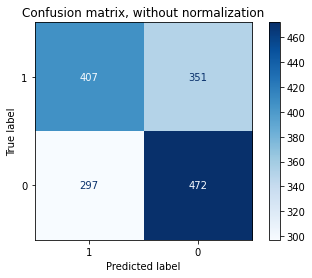

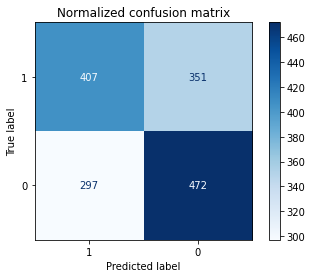

In [63]:
rfc_clf = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
rfc_clf.fit(X_train, y_train)
y_pred = rfc_clf.predict(X_test)
print("Detailed classification report for Randon Forest: ")
print(classification_report(y_test, y_pred))
print("Confusion matrix for Randon Forest: ")
print(confusion_matrix(y_test, y_pred))
plotConfusionMatrix(rfc_clf,X_test,y_test,y_pred,labels)